# Airline twitter

## Cleaning The Data

In [160]:
import pandas as pd

data_df = pd.read_csv("tweets.csv",index_col=0)
data_df

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
"5,70306133677761E+017",neutral,1,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
"5,70301130888122E+017",positive,"0,3486",NaN,0,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experien...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
"5,70301083672814E+017",neutral,"0,6837",NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didn't today... Must mean I need to take an...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
"5,70301031407624E+017",negative,1,Bad Flight,"0,7033",Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
"5,70300817074463E+017",negative,1,Can't Tell,1,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"5,69587686496825E+017",positive,"0,3487",NaN,0,American,NaN,KristenReenders,NaN,0,thank you we got on a different flight to Chi...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
"5,69587371693355E+017",negative,1,Customer Service Issue,1,American,NaN,itsropes,NaN,0,leaving over 20 minutes Late Flight. No warni...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
"5,69587242672398E+017",neutral,1,NaN,NaN,American,NaN,sanyabun,NaN,0,Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN


In [125]:
df=data_df[["airline", "airline_sentiment","text"]].groupby(["airline","airline_sentiment"])["text"].apply(lambda x: ','.join(x)).reset_index()


In [126]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [127]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text_1(text):
    # Lowercase
    text = text.lower()
    # Remove special text in brackets ([chorus],[guitar],etc)
    text = re.sub('\[.*?\]', '', text)
    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)    
    # Remove quotes
    text = re.sub('[‘’“”…]', '', text)
    # Remove new line \n 
    text = re.sub('\n', ' ', text)
    # Remove stop_word
    stop_words = stopwords.words('english')
    words = word_tokenize(text)
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text
    

In [128]:
# Let's take a look at the updated text
df["text"] = pd.DataFrame(df.text.apply(clean_text_1))

In [129]:
df

,airline,airline_sentiment,text
0,American,negative,would even consider continuing point program ...
1,American,neutral,weve already made arrangements seconds touchd...
2,American,positive,believe understand flight originally booked s...
3,Delta,negative,werent flight came late flight jetblue employ...
4,Delta,neutral,hope fly often would hate change airlines fli...
5,Delta,positive,yesterday way ewr fll takeoff wheelsup jetblu...
6,Southwest,negative,still waiting hit one hour although im happy ...
7,Southwest,neutral,im teaching new travelers research budget amp...
8,Southwest,positive,thank much completely made things right love ...
9,US Airways,negative,better time call flight friday need change wo...


## Stemming / Lemmatization

In [130]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [131]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_tag(text):
    lemma=[]
    for i,j in pos_tag(word_tokenize(text)) :
        p=j[0].lower()
        if p in ['j','n','v']:
            if p == 'j':
                p = 'a'
            lemma.append(wnl.lemmatize(i,p))
        else :
            lemma.append(wnl.lemmatize(i))    
    return ' '.join(lemma)



In [132]:
df["text_lemmatize"]= pd.DataFrame(data_clean.text.apply(lemmatize_tag))

In [133]:
df

,airline,airline_sentiment,text,text_lemmatize
0,American,negative,would even consider continuing point program ...,would even consider continue point program rec...
1,American,neutral,weve already made arrangements seconds touchd...,weve already make arrangement second touchdown...
2,American,positive,believe understand flight originally booked s...,believe understand flight originally book sund...
3,Delta,negative,werent flight came late flight jetblue employ...,werent flight come late flight jetblue employe...
4,Delta,neutral,hope fly often would hate change airlines fli...,hope fly often would hate change airline fligh...
5,Delta,positive,yesterday way ewr fll takeoff wheelsup jetblu...,yesterday way ewr fll takeoff wheelsup jetblue...
6,Southwest,negative,still waiting hit one hour although im happy ...,still wait hit one hour although im happy canc...
7,Southwest,neutral,im teaching new travelers research budget amp...,im teach new traveler research budget amp save...
8,Southwest,positive,thank much completely made things right love ...,thank much completely make thing right love al...
9,US Airways,negative,better time call flight friday need change wo...,good time call flight friday need change worry...


In [134]:
df.to_csv('airline_tweets_clean.csv')

## Frequency Term matrix

In [135]:
df

,airline,airline_sentiment,text,text_lemmatize
0,American,negative,would even consider continuing point program ...,would even consider continue point program rec...
1,American,neutral,weve already made arrangements seconds touchd...,weve already make arrangement second touchdown...
2,American,positive,believe understand flight originally booked s...,believe understand flight originally book sund...
3,Delta,negative,werent flight came late flight jetblue employ...,werent flight come late flight jetblue employe...
4,Delta,neutral,hope fly often would hate change airlines fli...,hope fly often would hate change airline fligh...
5,Delta,positive,yesterday way ewr fll takeoff wheelsup jetblu...,yesterday way ewr fll takeoff wheelsup jetblue...
6,Southwest,negative,still waiting hit one hour although im happy ...,still wait hit one hour although im happy canc...
7,Southwest,neutral,im teaching new travelers research budget amp...,im teach new traveler research budget amp save...
8,Southwest,positive,thank much completely made things right love ...,thank much completely make thing right love al...
9,US Airways,negative,better time call flight friday need change wo...,good time call flight friday need change worry...


In [136]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df.text_lemmatize)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.airline.map(str)+"-"+df.airline_sentiment.map(str)
#data_dtm[["airline","airline_sentiment"]]=df[["airline","airline_sentiment"]]

data_dtm

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zipper,zkatcher,zombie,zone,zoom,zrh,zrhairport,zukes,zurich,zurichnew
American-negative,114,0,1,0,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
American-neutral,28,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
American-positive,24,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Delta-negative,1,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
Delta-neutral,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Delta-positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southwest-negative,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
Southwest-neutral,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Southwest-positive,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
US Airways-negative,18,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [137]:
# Find the top 30 words 

data=data_dtm.transpose()

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

# Print the top 30 words said by each artist
for airline_sentiment, top_words in top_dict.items():
    print(airline_sentiment)
    print(', '.join([word for word, count in top_words[0:30]]))
    print('---')

American-negative
flight, cancel, hour, help, customer, service, wait, flightled, hold, time, need, bag, try, phone, agent, aa, im, delay, day, plane, make, say, tell, bad, dont, amp, dfw, change, gate, seat
---
American-neutral
flight, help, cancel, need, thanks, aa, dfw, change, dm, tomorrow, fly, im, book, number, know, check, time, ticket, way, make, like, look, flightled, status, thank, use, try, today, hi, travel
---
American-positive
thanks, thank, flight, great, service, good, aa, make, customer, love, appreciate, work, new, help, guy, plane, awesome, airline, response, crew, today, im, fly, like, yes, amp, dfw, nice, agent, time
---
Delta-negative
flight, delay, hour, time, jetblue, plane, wait, jfk, im, service, customer, amp, say, fly, make, bag, dont, cancel, tell, need, help, leave, sit, airport, board, work, pay, guy, try, fleek
---
Delta-neutral
flight, fleek, fleet, rt, new, fly, im, check, ceo, wall, need, thanks, like, passenger, way, know, time, say, help, change, bo

In [138]:
from wordcloud import WordCloud

stop_words2=[]
stop_words2.extend(['flight','thank','thanks','get','u'])
wc = WordCloud(collocations=False, stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

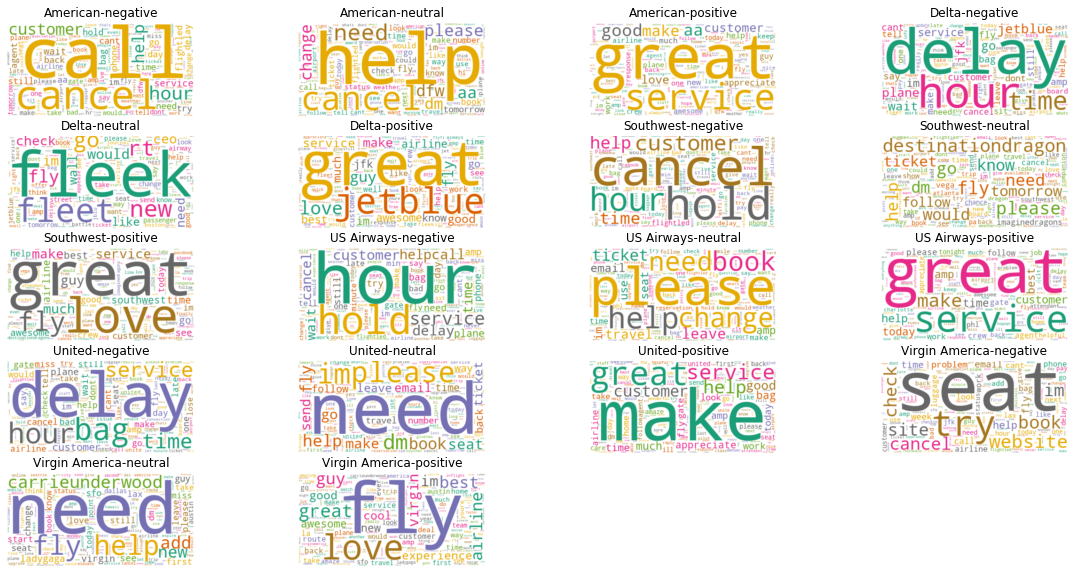

In [139]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

# Create subplots for each comedian
for index, column in enumerate(data.columns):
    wc.generate(df.text_lemmatize[index])
    
    plt.subplot(5, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(data.columns[index])
    
plt.show()


## Sentiment analysis

In [147]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_df['polarity'] = data_df['text'].apply(pol)
data_df['subjectivity'] = data_df['text'].apply(sub)
data_df[['airline_sentiment','polarity']]

,airline_sentiment,polarity
tweet_id,,
"5,70306133677761E+017",neutral,0.000000
"5,70301130888122E+017",positive,0.000000
"5,70301083672814E+017",neutral,-0.390625
"5,70301031407624E+017",negative,0.006250
"5,70300817074463E+017",negative,-0.350000
...,...,...
"5,69587686496825E+017",positive,0.000000
"5,69587371693355E+017",negative,-0.300000
"5,69587242672398E+017",neutral,0.000000


In [149]:
df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)
df[['airline','airline_sentiment','polarity']]

,airline,airline_sentiment,polarity
0,American,negative,-0.034051
1,American,neutral,0.161903
2,American,positive,0.331615
3,Delta,negative,0.005624
4,Delta,neutral,0.152565
5,Delta,positive,0.352530
6,Southwest,negative,-0.025129
7,Southwest,neutral,0.184151
8,Southwest,positive,0.350854
9,US Airways,negative,-0.071169


### Vader (Valence Aware Dictionary and sEntiment Reasoner) 

In [155]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mausoto/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [156]:
data_df['vader_scores'] = data_df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [157]:
data_df[['airline_sentiment','polarity','vader_scores']].sample(10)

,airline_sentiment,polarity,vader_scores
tweet_id,,,
"5,69708573762023E+017",neutral,0.200000,0.6369
"5,69609163824714E+017",neutral,0.000000,0.0000
"5,68187725834289E+017",neutral,-0.125000,0.4199
"5,6838279050639E+017",negative,0.425000,0.0000
"5,69115483313582E+017",negative,-0.260000,0.2748
"5,69696666611261E+017",negative,-1.000000,0.0000
"5,68488247514554E+017",negative,0.068182,-0.3937
"5,68894687911633E+017",negative,0.200000,0.0000
"5,68644929595056E+017",negative,0.000000,0.0000


In [159]:
vader_score = lambda x: sid.polarity_scores(x)['compound']

df['compound'] = df['text'].apply(vader_score)
df[['airline_sentiment','polarity','compound']]

,airline_sentiment,polarity,compound
0,negative,-0.034051,-1.0000
1,neutral,0.161903,0.9999
2,positive,0.331615,1.0000
3,negative,0.005624,-0.9998
4,neutral,0.152565,1.0000
5,positive,0.352530,1.0000
6,negative,-0.025129,-0.9999
7,neutral,0.184151,1.0000
8,positive,0.350854,1.0000
9,negative,-0.071169,-1.0000


## Topic Generation

In [173]:
neg_comments=data_df[data_df['airline_sentiment']=="negative"]


In [176]:
neg_comments["text_lemmatize"] = neg_comments.text.apply(clean_text_1).apply(lemmatize_tag)

/home/mausoto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [177]:
neg_comments.head(3)

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,text_lemmatize
tweet_id,,,,,,,,,,,,,,,
"5,70301031407624E+017",negative,1,Bad Flight,"0,7033",Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""en...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
"5,70300817074463E+017",negative,1,Can't Tell,1,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
"5,70300767074181E+017",negative,1,Can't Tell,"0,6842",Virgin America,NaN,jnardino,NaN,0,seriously would pay $30 a flight for seats th...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),seriously would pay flight seat didnt play rea...


In [178]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

data_nouns_adj = pd.DataFrame(neg_comments.text_lemmatize.apply(nouns_adj))
data_nouns_adj

,text_lemmatize
tweet_id,
"5,70301031407624E+017",aggressive blast obnoxious entertainment guest...
"5,70300817074463E+017",big bad thing
"5,70300767074181E+017",flight seat didnt play bad thing fly va
"5,70282469121008E+017",sfopdx schedule
"5,70276917301137E+017",flew nyc sfo last week sit seat due large gent...
...,...
"5,69588464896876E+017",thx nothing u country u plane come one
"5,69587705937601E+017",flight cancel tomorrow morning auto tuesday ni...
"5,69587691626623E+017",cue delays👌


In [184]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from gensim import matutils, models
import scipy.sparse

add_stop_words = ['flight','im']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, min_df=2)
data_cvna = cvna.fit_transform(data_nouns_adj.text_lemmatize)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [187]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=6, id2word=id2wordna, passes=40)
ldana.print_topics()

[(0,
  '0.044*"phone" + 0.038*"change" + 0.038*"help" + 0.024*"reservation" + 0.022*"number" + 0.019*"online" + 0.019*"agent" + 0.015*"email" + 0.014*"try" + 0.014*"ticket"'),
 (1,
  '0.049*"hour" + 0.048*"wait" + 0.042*"plane" + 0.030*"gate" + 0.030*"time" + 0.028*"minute" + 0.025*"hr" + 0.023*"sit" + 0.020*"delay" + 0.017*"problem"'),
 (2,
  '0.068*"cancel" + 0.030*"help" + 0.025*"tomorrow" + 0.022*"home" + 0.020*"need" + 0.016*"wont" + 0.015*"aa" + 0.015*"dfw" + 0.015*"trip" + 0.014*"ticket"'),
 (3,
  '0.054*"day" + 0.030*"seat" + 0.016*"doesnt" + 0.016*"airline" + 0.012*"time" + 0.012*"work" + 0.011*"response" + 0.011*"pay" + 0.011*"charge" + 0.011*"guy"'),
 (4,
  '0.061*"hour" + 0.030*"delay" + 0.026*"cancel" + 0.026*"bad" + 0.024*"time" + 0.022*"late" + 0.019*"weather" + 0.014*"ive" + 0.014*"flightr" + 0.013*"today"'),
 (5,
  '0.068*"customer" + 0.067*"service" + 0.026*"bag" + 0.016*"miss" + 0.012*"connection" + 0.011*"luggage" + 0.010*"dont" + 0.010*"care" + 0.010*"delay" + 0.01